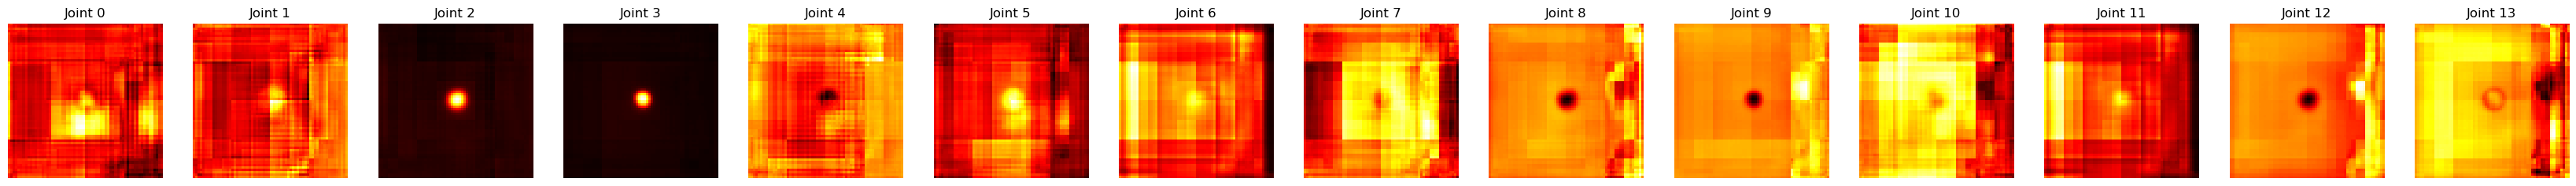

In [15]:
import torch
from model.StackedHourGlass import get_pose_net
import matplotlib.pyplot as plt
import cv2

# 1. Load model
num_joints = 14  # <-- adjust to match your dataset
model = get_pose_net(in_ch=3, out_ch=num_joints)
ckpt = torch.load("/home/jmnsha002/SLP-Dataset-and-Code/output_StackedHG_RGB_Cover2_Refined/SLP_RGB_2_StackedHourGlass_ts1/model_dump/model_best.pth", map_location="cpu", weights_only=False)
model.load_state_dict(ckpt["state_dict"])
model.eval()

# 2. Load test image
img = cv2.imread("/scratch/jmnsha002/SLP2022/SLP/danaLab/00001/RGB/cover2/image_000001.png")[:, :, ::-1]
img_resized = cv2.resize(img, (256, 256))
tensor_img = torch.from_numpy(img_resized).permute(2,0,1).unsqueeze(0).float() / 255.0

# 3. Run inference
with torch.no_grad():
    out = model(tensor_img)
    final_heatmaps = out[-1]

# 4. Visualize heatmaps
hm = final_heatmaps[0].cpu()
n_joints = hm.shape[0]

fig, axes = plt.subplots(1, n_joints, figsize=(3*n_joints, 3))
for j in range(n_joints):
    axes[j].imshow(hm[j].numpy(), cmap='hot')
    axes[j].set_title(f"Joint {j}")
    axes[j].axis('off')
plt.show()

